# Classification

Classification is a *supervised learning* mechanism for labeling a sample based on the features. Supervised learning means that we have labels for classification or number for regression that the algorithm should learn.

We will look at various classification models in the section. Sklearn implements many common and useful models. We will also see some that are not in sklearn; but the implementation is the similar.

In sklearn we create a model instance and fall the `.fit` method on it with the training data and training labels. We can now call the `.predict` method (or the `.predict_proba` or `.predict_log_proba` methods) with the fitted model. To evaluate the model, we use the `.score` method with testing data and testing labels.

## Difficulties

The biggest challenge is usually arranging data in a form that will work with sklearn. The data (X) should be an (m by n) numpy array (or pandas DataFrame) with m rows of sample data each with n features (columns). The label (y) is a vector (or pandas series) of size m with a value (class) for each sample.

## Methods

The `.score` method returns the mean accuracy, which by itself might not be sufficient to evaluate a classifier. 

We will look at many models and discuss their efficiency, preprocessing techniques they require, how to prevent overfitting, and if the model supports intuitive interpretation of results.

The general methods that sklearn type models implement are:

- `.fit(X, y[, sample_weight]` Fit a model
- `.predict(X)` Predict Classes
- `.predict_log_proba(X)` Predict log probability
- `.predict_proba(X)` Predict probability
- `.score(X, y[, sample_weight])` Get accuracy

## Big O Notation

Big O notation is a mathematical notation that describes the limiting behavior of a function when the argument tends towards a particular value or infinity.

It is used to classify algorithms according to how their running time or space requirements grow as the input size grows.

Big O notation characterizes functions according to their growth rates: different functions with the same growth rate may be represented using the same O notation.

The letter O is used because the growth rate of a function is also referred to as the order of the function. A description of a function in terms of big O notation usually only provides an upper bound on the growth rate of the function.

## Logistic Regression

Logistic regression estimates probabilities by using a logistic function. *Even though it has regression in the name, it is used for classification*. 

### Model Characteristics

- *Runtime efficiency:* Can use `n_jobs` if not using `liblinear` solver
- *Preprocess data:* If `solver` is set to `sag` or `saga`, standarize so that convergence works. Can handle sparse input.
- *Prevent overfitting:* The `C` parameter controls regularization (Lower `C` is more regularization, higher means less.) Can specify `penalty` to 'l1' or 'l2'.
- *Interpret results:* The `.coef_` attribute of the fitted model shows the decision function coefficients. A change in x one unit changes the log odds ratio by the coefficient. The `.intercept_` attribute is the inverse log odds of the baseline condition. 

### Logistic Regression Model Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
X_train = pd.read_csv('data/titanic_X_train.csv')
X_test = pd.read_csv('data/titanic_X_test.csv')
y_train = pd.read_csv('data/titanic_y_train.csv')['survived']
y_test = pd.read_csv('data/titanic_y_test.csv')['survived']

In [3]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
lr.score(X_test, y_test)

0.7938931297709924

Here is what some new data should look like

In [7]:
X.iloc[[0]] 

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,3.0,26.487044,0.0,0.0,8.6625,1,0,1


In [7]:
lr.predict(X.iloc[[0]])

array([0])

In [8]:
lr.predict_proba(X.iloc[[1]])

array([[0.88588367, 0.11411633]])

The intercept is the *log odds* of the baseline condition. We can convert it back to a percent accuracy (proportion):

In [12]:
lr.intercept_

array([3.13627116])

Using the inverse logit function, we see that the baseline for survival is XX%

In [13]:
def inv_logit(p):
    return np.exp(p) / (1+np.exp(p))

In [14]:
inv_logit(lr.intercept_) # Need to take a look at the dataset. Should be around 34%

array([0.95836435])

We can inspect the coefficients. The inverse logit of the coefficients gives the proportion of the positive cases. In this case, if fare goes up, we are more likely to survive. If gender is male, we are less likely to survive:

In [15]:
cols = X.columns

In [16]:
for col, val in sorted(zip(cols, lr.coef_[0]),
                      key = lambda x: x[1],
                      reverse=True):
    print(f"{col:10}{val:10.3f} {inv_logit(val):10.3f}")

fare           0.004      0.501
age           -0.015      0.496
parch         -0.070      0.483
sibsp         -0.232      0.442
embarked_S    -0.452      0.389
embarked_Q    -0.499      0.378
pclass        -0.682      0.336
sex_male      -2.340      0.088


Yellowbrick can visualize the coefficents.The `relative=True` parameter allows the largest value to be 100 (or -100), and the others are the percentages of that:

In [17]:
from yellowbrick.model_selection import FeatureImportances

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


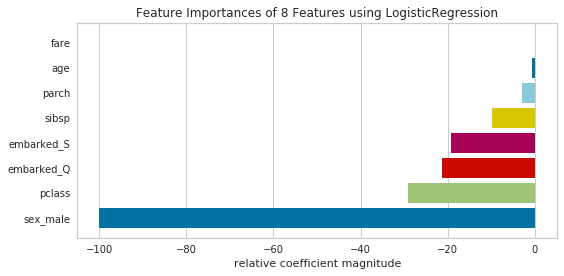

In [18]:
fig, ax = plt.subplots(figsize=(8,4))
fi_viz = FeatureImportances(lr)
fi_viz.fit(X,y)
fi_viz.poof();

# Naive Bayes
See [Naive Bayes](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.05-Naive-Bayes.ipynb) for more in-depth coverage.

Naive Bayes is a probabilistic classifier that assumes independence between the features of the data. It is popular for text classification applications, such as catching spam. 

One advantage of this model is that it assumes feature independence. It can train a model with a small number of samples.

Downside is that it cannot catch interactions between features.

This simple model can work with data that has many features. Therefore, it serves as a good baseline model.

There are three classes in sklearn: `GaussianNB`, `MultinomialNB`, and `BernoulliNB`. The first assumes a Guassian Distribution, the second is for discrete occurence counts, and the third is for discrete Boolean features.

## Model Characteristics

- *Runtime efficiency* Training O(Nd), where N is the number of training examples and d is the dimensionality. Testing O(cd), where c is the number of classes

- *Preprocess data* Assumes that data is independent. Should perform better after removing colinear columns. For continuous numerical data, might be good to bin data. Gaussian assumes normal distribution, and you might need to transform data to convert to normal distribution.

- *Prevent overfitting* Exhibits high bias and low variance (ensembles won't reduce variance)

- *Interpret results* Percentage is the likelihood that a sample belongs to a class based on priors. 

Here is an example using the this model:

In [9]:
from sklearn.naive_bayes import GaussianNB

In [10]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.7557251908396947

In [11]:
nb.predict(X.iloc[[0]])

array([0])

In [12]:
nb.predict_proba(X.iloc[[0]])

array([[0.95955265, 0.04044735]])

### Danger Zone

These models are susceptible to the *zero probability probelm*. If you try to classify a new sample that has no training data, it will have a zero probability. One solution is to use *Laplace smoothing*. Sklearn controls this with the `alpha` parameter, which default value is 1 and enables smoothing on the `Multinominal` and `BernoulliNB` models.

# Support Vector Machine
See [Support Vector Machine](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb) for more in-depth coverage.

A Support Vector Machine (SVM) is an algorithm that tries to fit a line (or plane or hyperplane) between the different classes that maximizes the distance from the line to the points of the classes. In this way it tries to find a robust separation between the classes. The *support vectors* are the points of the edge of the dividing hyperplane.

## Overview

SVM generally performs well and can support linear spaces or nonlinear spaces by using a *kernel trick*. The kernel trick is the idea that we can create a decision boundary in a new dimension by minimizing a formula that is easier to calculate than actually mapping the points to the new dimension. The default kernel is the Radial Basics Function (`rbf`), which is controlled by the `gamma` parameter and can map an input space into a high dimensional space. 

## Model Characteristics

- *Runtime efficiency* The scikit-learn implementation is $O(n^4)$, so it can be hard to scale to large sizes. Using a linear kernel o rthe `LinearSVC` model can improve the runtime performance at perhaps the cost of accuracy. Upping the `cache_size` parameter can bring that down to $O(n^3)$.

- *Preprocess data* The algorithm is not scale invariant. Standardizing the dta is highly recommended.

- *Prevent overfitting* The `C` (penalty parameter) controls regularization. A smaller value allows for a smaller margin in the hyperplane. A higher value for `gamma` will tend to overfit the training data. The `LinearSVC` model supports a `loss` and `penalty` parameter to support regularization.

- *Interpret results* Inspect `.support_vectors_`, though these are hard to explain. With linear kernels, you can inspect `coef_`. 

In [13]:
from sklearn.svm import SVC

In [14]:
svc = SVC(random_state=42, probability=True, gamma='auto')

In [15]:
svc.fit(X_train, y_train)
svc.score(X_test, y_test)


0.6539440203562341

In [16]:
svc.predict(X.iloc[[0]])

array([0])

In [17]:
svc.predict_proba(X.iloc[[0]])

array([[0.79332195, 0.20667805]])

To get the probability, use `probability=True`, which will slow down fitting of the model. 

This is similar to a perceptron, but will find the maximum margin. If the data is not linearly separable, it will minimize the error. Alternative, a different kernel may be used. 

# K-Nearest Neighbors

The K-Nearest Neighbor (KNN) algorithm classifies based on distance to some number (k) of training samples. The algorithm family is called `instance-based` learning as there are no parameters to learn. This model assumes that distance is sufficient for inference; otherwise it makes no assumptions about the underlying data or its distributions.

The hard part is selecting the appropriate k value. Also, the curse of dimensionality can hamper distance metrics as there is little difference in high dimensions between nearest and farthest neighbor.

## Model Characteristics

- *Runtime efficiency* Training O(1), but need to store data. Testing O(Nd) where N is the number of training examples, and d is dimensionality.

- *Prepross data* Distance-based calculations perform better when standardized. 

- *Prevent overfitting* Raise `n_neighbors`. Change `p` for L1 or L2 metric.

- *Interpret results* Interpret the k-nearest neighbors to the samplel (using the `.kneighbors` method). Those neighbors (if you can explain them) explain your result.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
knc.score(X_test, y_test)

0.6335877862595419

In [25]:
knc.predict(X.iloc[[0]])

array([0])

In [26]:
knc.predict_proba(X.iloc[[0]])

array([[0.8, 0.2]])

# Decision Tree

See [Decision Tree and Random Forest](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb) for more in-depth coverage.

A decision tree is like going to a doctor who asks a series of questions to determine the cause of your symptoms. We can use a process to create a decision tree and have a series of questions to predict a target class. 

The advantages of this model include support for non-numeric data (in some implementations), little data preparation (no need for scaling), support for dealing with nonlinear relationships, feature importances are revealed, and easy to explain.

## Model Characteristics

- *Runtime efficiency* For creation, loop over each of the m features, and sort all n samples, O(mn log n). For predicting, you walk the tree, O(height).

- *Preprocess data* Scaling is not necessary. Need to get rid of missing values and convert to numeric.

- *Prevent overfitting* Set `max_depth` to a lower number, raise `min_impurity_decrease`.

- *Interpret results* Can setup through the tree of choices. Since there are steps, a tree is bad at dealing with linear relationships (a small change in a number can go down a different path). The tree is also highly dependent on the training data. A small change can change the whole tree.

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3)

In [7]:
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.8142493638676844

In [8]:
dt.predict(X.iloc[[0]])

array([0])

In [9]:
dt.predict_proba(X.iloc[[0]])

array([[0.87954545, 0.12045455]])

In [10]:
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz

In [11]:
dot_data = StringIO()

In [12]:
export_graphviz(dt, out_file=dot_data, 
                     feature_names=X.columns,
                    class_names=["Died","Survived"],
                    filled=True)

In [13]:
g = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [14]:
from IPython.display import Image

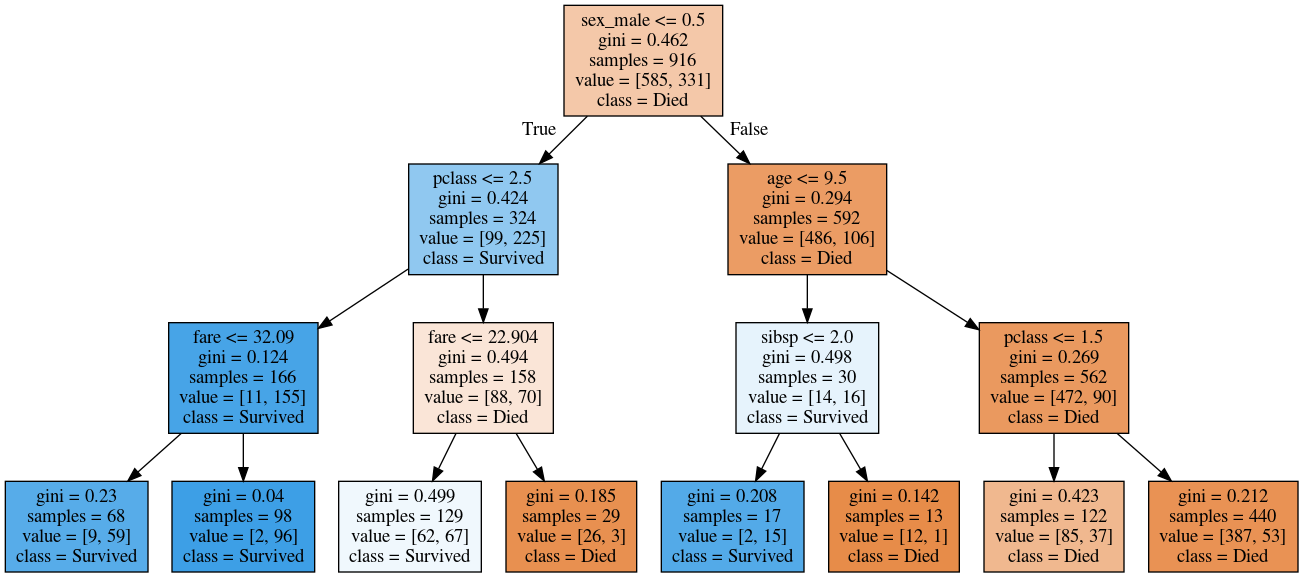

In [15]:
Image(g.create_png())

The `dtreeviz` package can aid in understanding how the decision tree works. It creates a tree with labeled histographs, which gives valuable insight

In [16]:
from dtreeviz.trees import *
from sklearn import tree

In [17]:
viz = dtreeviz(dt, 
               X, 
               y, 
               target_name="survived",
               feature_names=X.columns,
               class_names = ["died", "survived"])
#viz
viz.view() # For pop-up window.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


Feature importance showing Gini importance (reduction of error by using that feature):

In [58]:
for col, val in sorted(zip(X.columns, dt.feature_importances_),
                      key = lambda x: x[1],
                      reverse = True)[:5]:
    print(f"{col:10}{val:10.3f}")

sex_male       0.607
pclass         0.248
sibsp          0.052
fare           0.050
age            0.043


You can also use Yellobrick to visualize feature importance

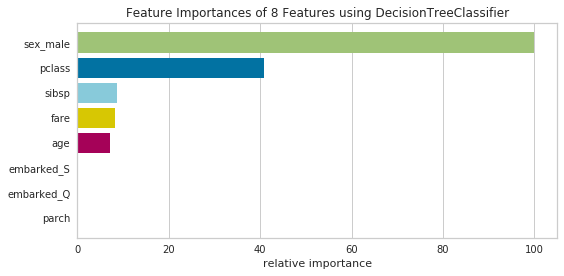

In [61]:
fig, ax = plt.subplots(figsize=(8,4))
fi_viz = FeatureImportances(dt)
fi_viz.fit(X,y)
fi_viz.poof();

# Random Forest

A random forest is an ensemble of decision trees. It uses *bagging* to correct the tendency of decision trees to overfit. By creating many trees trained on random subsamples of the samples and random features of the data, the variance is lowered. 

Since they train on subsamples of the data, random forests can evaluate OOB error and evaluate performance. They can also track feature importance by averaging the feature importance over all of the trees.

The intuition of understanding bagging is that if you are creating a jury, you should add anyone who has a greater than 50% chance of delivering the correct verdict and then average their decisions. Every time you add another member (and their selection process is independent of the others), you will get a better result. 

The idea with random forests is to create a "forest" of decision trees trained on different columns of the training data. If each tree has a better than 50% chance of correct classification, you should incorporate its prediction. The random forest has been an excellent tool for both classification and regression, through it has recently fallen out of favor for gradient-boosted trees.

## Model Characteristics

- *Runtime efficiency* Need to create j random trees. This can be done in parallel using `n_jobs`. Complexity for each tree is O(mn log n), where n is the number of samples and m is the number of features. For creation, loop over each of the m features and sort all n samples, O(mn log n). For predicting, walk the tree O(height).

- *Preprocess data* Not Necessary.

- *Prevent Overfitting* Add more trees (`n_estimators`). Use lower `max_depth`.

- *Interpret results* Supports feature importance, but we don't have a single decision tree that we can walk through. Can inspect single trees from the ensemble. 

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7709923664122137

In [64]:
rf.predict(X.iloc[[0]])

array([0])

In [65]:
rf.predict_proba(X.iloc[[0]])

array([[1., 0.]])

In [67]:
for col, val in sorted(zip(X.columns, rf.feature_importances_),
                      key = lambda x: x[1],
                      reverse = True)[:5]:
    print(f"{col:10}{val:10.3f}")

age            0.280
fare           0.274
sex_male       0.230
pclass         0.086
sibsp          0.053


# XGBoost

Although sklearn has a `GradientBoostedClassifier`, it is better to use a third-party implementation.

XGBoost creates a weak tree and then "boosts" the subsequent trees to reduce the residual errors. It tries to capture and address any patterns in the errors until they appear to be random. 

## Model Characteristics

- *Runtime efficiency* XGBoost is parallelizeable. Use the `n_jobs` option to indicate the number of CPUs. Use GPU for even better performance. 

- *Preprocess data* No scaling necessary with tree models. Need to encode categorical data.

- *Prevent overfitting* The `early_stopping_rounds=N` parameter can be set to stop training if there is no improvement after N rounds. L1 and L2 regularization are controlled by `reg_alpha` and `reg_lambda`, respectively. Higher numbers are more conservative.

- *Interpret results* Has feature importance.

XGBoost has an extra parameter for the `.fit` method. The `early_stopping_rounds` parameter can be combined with the `eval_set` parameter to tell XGBoost to stop creating trees in the evaluation metric has not improved after that many boosting rounds. The `eval_metric` can also be set to one of the following `rmse`, `mae`, `logloss`, `error` (default), `auc`, `aucpr`.

In [69]:
import xgboost as xgb
xgb_class = xgb.XGBClassifier(random_state=42)

In [70]:
xgb_class.fit(X_train, y_train,
             early_stopping_rounds=10,
             eval_set=[(X_test, y_test)])

[0]	validation_0-error:0.188295
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.188295
[2]	validation_0-error:0.188295
[3]	validation_0-error:0.188295
[4]	validation_0-error:0.188295
[5]	validation_0-error:0.188295
[6]	validation_0-error:0.203562
[7]	validation_0-error:0.203562
[8]	validation_0-error:0.203562
[9]	validation_0-error:0.203562
[10]	validation_0-error:0.203562
Stopping. Best iteration:
[0]	validation_0-error:0.188295



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [71]:
xgb_class.score(X_test, y_test)

0.811704834605598

In [72]:
xgb_class.predict(X.iloc[[0]])

array([0])

In [73]:
xgb_class.predict_proba(X.iloc[[0]])

array([[0.53754187, 0.46245816]], dtype=float32)

In [74]:
for col, val in sorted(zip(X.columns, xgb_class.feature_importances_),
                      key = lambda x: x[1],
                      reverse = True)[:5]:
    print(f"{col:10}{val:10.3f}")

sex_male       0.665
pclass         0.155
sibsp          0.069
embarked_S     0.042
age            0.038


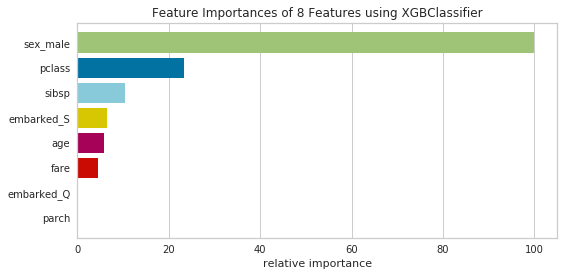

In [75]:
fig, ax = plt.subplots(figsize=(8,4))
fi_viz = FeatureImportances(xgb_class)
fi_viz.fit(X,y)
fi_viz.poof();

XGBoost provides both a textual representation of the trees and a graphical one. Here is the graphical:

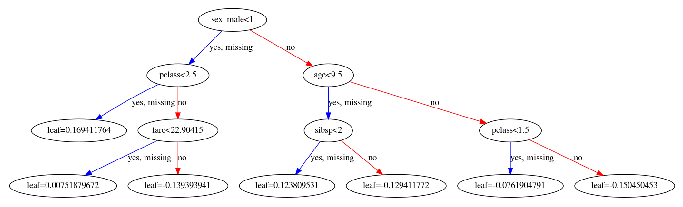

In [80]:
fig, ax = plt.subplots(figsize=(12,12))
xgb.plot_tree(xgb_class, ax=ax, num_trees=0);